In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('../input/spaceship-titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/spaceship-titanic/sample_submission.csv
../input/spaceship-titanic/train.csv
../input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv("../input/spaceship-titanic/train.csv")
test_data = pd.read_csv("../input/spaceship-titanic/test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train_data.set_index('PassengerId',inplace=True)
test_data.set_index('PassengerId',inplace=True)

In [5]:
train_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test_data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [6]:
train_data['Age'] =train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] =test_data['Age'].fillna(test_data['Age'].median())

In [7]:
train_data['VIP'] =train_data['VIP'].fillna(False)
test_data['VIP'] =test_data['VIP'].fillna(False)

In [8]:
train_data['Destination']=train_data['Destination'].fillna("PSO J318.5-22")
test_data['Destination']=test_data['Destination'].fillna("PSO J318.5-22")

In [9]:
train_data['CryoSleep'] =train_data['CryoSleep'].fillna(False)
test_data['CryoSleep'] =test_data['CryoSleep'].fillna(False)

In [10]:
train_data['Cabin'] =train_data['Cabin'].fillna('T/0/P')
test_data['Cabin'] =test_data['Cabin'].fillna('T/0/P')

In [11]:
print(train_data.isna().sum().nlargest(20))
print(test_data.isna().sum().nlargest(20))

HomePlanet      201
Name            200
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64
Name            94
HomePlanet      87
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64


In [12]:
 train_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


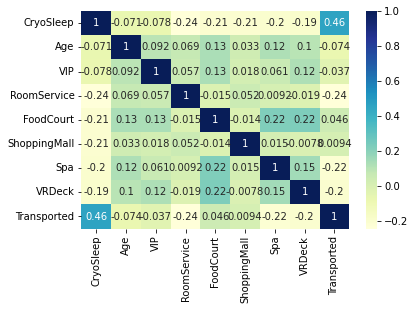

In [13]:
import seaborn as sns
import matplotlib as plt
ax = sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [14]:
train_data[['Deck','Num','Side']] = train_data.Cabin.str.split('/',expand=True)
test_data[['Deck','Num','Side']] = test_data.Cabin.str.split('/',expand=True)

In [15]:
train_data['total_spent']= train_data['RoomService']+ train_data['FoodCourt']+ train_data['ShoppingMall']+ train_data['Spa']+ train_data['VRDeck']
test_data['total_spent']=test_data['RoomService']+test_data['FoodCourt']+test_data['ShoppingMall']+test_data['Spa']+test_data['VRDeck']

In [16]:
train_data['AgeGroup'] = 0
for i in range(6):
    train_data.loc[(train_data.Age >= 10*i) & (train_data.Age < 10*(i + 1)), 'AgeGroup'] = i
test_data['AgeGroup'] = 0
for i in range(6):
    test_data.loc[(test_data.Age >= 10*i) & (test_data.Age < 10*(i + 1)), 'AgeGroup'] = i

In [17]:
train_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,total_spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0,3
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0,2
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0,5
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0,3
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,8536.0,4
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,0.0,1
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,1873.0,2


In [18]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((train_data[i], test_data[i])).astype(str)
    le.fit(arr)
    train_data[i]=le.transform(train_data[i].astype(str))
    test_data[i]=le.transform(test_data[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num


In [19]:
train_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,total_spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,0.0,3
0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1,736.0,2
0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,10383.0,5
0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,5176.0,3
0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1,0,A/98/P,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1872,0,8536.0,4
9278_01,0,1,G/1499/S,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,6,556,1,0.0,1
9279_01,0,0,G/1500/S,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,6,559,1,1873.0,2


In [20]:
train_data= train_data.drop(['Name','Cabin'],axis=1)
test_data= test_data.drop(['Name','Cabin'],axis=1)

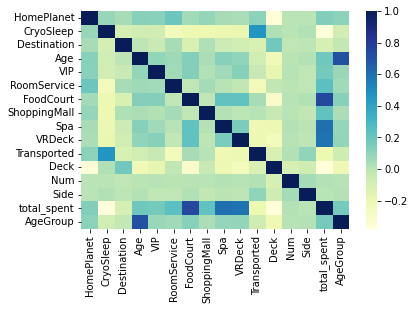

In [21]:
sns.heatmap(train_data.corr(), cmap="YlGnBu");

In [22]:
train_data['Transported']=train_data['Transported'].replace({True:1,False:0})

In [23]:
X=train_data.drop('Transported',axis=1)
y = train_data['Transported']

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Deck          8693 non-null   int64  
 11  Num           8693 non-null   int64  
 12  Side          8693 non-null   int64  
 13  total_spent   8693 non-null   float64
 14  AgeGroup      8693 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 1.1+ MB


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [27]:
from sklearn.metrics import accuracy_score
pred_y=model.predict(X_val)

pred=model.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.739223807332413
0.7309107635694572


In [28]:
y_pred = model.predict(test_data)

sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=test_data.index)

sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,False


In [29]:
sub.to_csv('submission')